# Day 1: 프로젝트 계획 및 데이터 수집 (~20%)
### 목표: 프로젝트 시나리오 합의 → 데이터 셋 구조/관계 이해 → 데이터 수집 및 파일/DB 준비
#### 주요 태스크:
- 프로젝트 주제 및 구체적 분석 목표 설정 
- 데이터 출처 조사 및 주요 테이블 이해
- API/CSV 등 데이터 다운로드 및 확인
- 데이터 관계/스키마 도식화, 기본 연결 테스트
- 데이터 품질 체크(결측치, 이상치, 타입 점검) 및 단일/병합 샘플 실습
- 진행도 체크: 데이터 관련 모든 준비가 완벽하게 끝나야 하며, 노트북에 주요 테이블이 로딩되어 있어야 함



* 데이터 이름 정리
* 이상치 탐지 필요
* 가설 수립 (최근 주문한 고객 , 자주 주문한고객, 주문수량이 많은고객)
1. ~지역사람들이 구매량이 많을 것이다. ~ 지역에 사는 사람이 ~ 카테고리의 상품을 많이 구매한다?

In [72]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
# 폰트 깨짐 방지: Matplotlib에 한글 폰트 설정
plt.rc('font', family='AppleGothic')
# 마이너스 기호 깨짐 방지
plt.rc('axes', unicode_minus=False)
# 경고 무시
import warnings
warnings.filterwarnings('ignore')

In [73]:
# 주요 테이블 로딩

customers = pd.read_csv("olist_customers_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
category_name = pd.read_csv("product_category_name_translation.csv")
geolocation= pd.read_csv("olist_geolocation_dataset.csv")


In [74]:
# 각 데이터셋 크기 확인
datasets = {
    "customers": customers,
    "orders": orders,
    "order_items": order_items,
    "products": products,
    "sellers": sellers,
    "payments": payments,
    "reviews": reviews,
    "category_name":category_name,
    "geolocation":geolocation
}

for name, df in datasets.items():
    print(f"{name}: {df.shape}")
    display(df.head(2))  # 앞부분 2행만 미리보기

customers: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


orders: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


order_items: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


products: (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


sellers: (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


payments: (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


reviews: (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


category_name: (71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


geolocation: (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [75]:
# 결측치 처리 
# 각 데이터셋 결측치 확인
for name, df in datasets.items():
    print(f"\n{name} 결측치 현황:")
    print(df.isnull().sum())


customers 결측치 현황:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

orders 결측치 현황:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

order_items 결측치 현황:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

products 결측치 현황:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm   

In [76]:
#기본 통계치, 데이터 타입 확인 
# orders 데이터 예시
print(order_items.info())      # 데이터 타입 확인
print(order_items.describe()) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%    

In [77]:
# 테이블 관계 병합 
# 고객, 주문 데이터 
orders_customers = orders.merge(customers, on="customer_id", how="left")
print(orders_customers.shape)
display(orders_customers.head(3))

# 주문, 리뷰데이터 
orders_reviews = orders.merge(reviews[['order_id','review_score']], 
                              on="order_id", how="left")
display(orders_reviews.head(3))
orders_items = orders.merge(order_items, on="order_id", how="left")
# 주문 금액 = 가격 + 배송비
orders_items['total_price'] = orders_items['price'] + orders_items['freight_value']
display(orders_items.head(3))

(99441, 12)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12


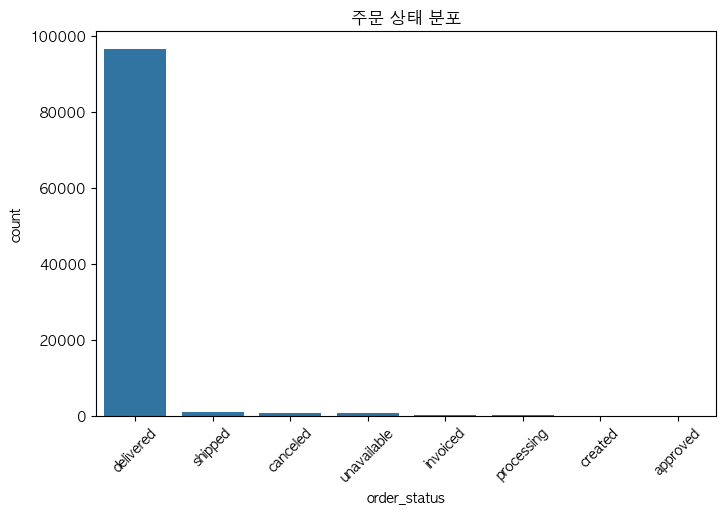

In [78]:
# 시각화 
# 주문 상태 분포
plt.figure(figsize=(8,5))
sns.countplot(data=orders, x="order_status", order=orders['order_status'].value_counts().index)
plt.title("주문 상태 분포")
plt.xticks(rotation=45)
plt.show()

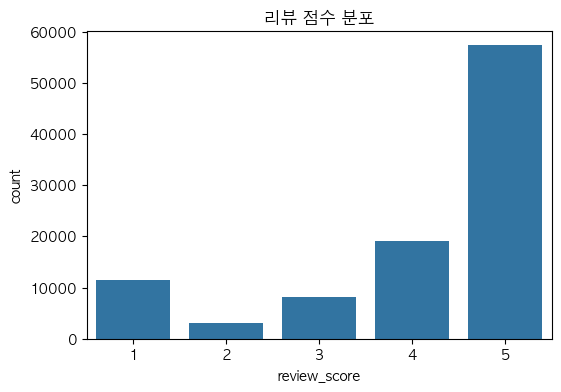

In [79]:
# 리뷰 점수 분포
plt.figure(figsize=(6,4))
sns.countplot(data=reviews, x="review_score")
plt.title("리뷰 점수 분포")
plt.show()

In [80]:

# orders 데이터셋을 불러옵니다.
# 사용자 정의 변수명을 참조하여 코드를 작성합니다.
print("=== 'orders' 데이터셋 결측치 현황 ===")
print(orders.isnull().sum())

# 배송 완료일(`order_delivered_customer_date`)이 없는 주문은 배송이 완료되지 않은 상태입니다.
# 배송 성과 분석을 위해 이 행들을 제거합니다.
orders.dropna(subset=['order_delivered_customer_date'], inplace=True)
print("\n배송 미완료 주문 제거 후 데이터 크기:", orders.shape)

# 추가적으로, 결제 승인일(`order_approved_at`)이 없는 주문도 분석에서 제외할 수 있습니다.
# 이는 유효하지 않은 주문으로 간주될 수 있기 때문입니다.
orders.dropna(subset=['order_approved_at'], inplace=True)
print("\n결제 미승인 주문 제거 후 최종 데이터 크기:", orders.shape)
print("\n결제 미승인 주문 제거 후 최종 데이터 크기:", orders .shape)


# 결측치가 제거된 최종 데이터셋의 결측치 현황을 다시 확인합니다.
print("\n=== 최종 데이터셋 결측치 재확인 ===")
print(orders.isnull().sum())

# 결측치가 제거된 데이터셋의 상위 5개 행을 확인합니다.
print("\n=== 최종 데이터셋 미리보기 ===")
print(orders.head())

# reviews 데이터셋을 불러옵니다.
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

print("=== 'olist_order_reviews_dataset.csv' 결측치 현황 ===")
print(reviews.isnull().sum())

# 코멘트 관련 컬럼(`review_comment_title`, `review_comment_message`)의 결측치는
# 고객이 코멘트를 남기지 않았음을 의미하므로, 'no comment'로 채울 수 있습니다.
reviews['review_comment_title'].fillna('no comment', inplace=True)
reviews['review_comment_message'].fillna('no comment', inplace=True)

print("\n결측치 처리 후 현황:")
print(reviews.isnull().sum())

=== 'orders' 데이터셋 결측치 현황 ===
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

배송 미완료 주문 제거 후 데이터 크기: (96476, 8)

결제 미승인 주문 제거 후 최종 데이터 크기: (96462, 8)

결제 미승인 주문 제거 후 최종 데이터 크기: (96462, 8)

=== 최종 데이터셋 결측치 재확인 ===
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     1
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

=== 최종 데이터셋 미리보기 ===
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20de

=== orders: 'delivery_time_days' 이상값 처리 전 통계 ===
count    96462.000000
mean        12.558592
std          9.547170
min          0.533414
25%          6.765885
50%         10.216574
75%         15.720472
max        209.628611
Name: delivery_time_days, dtype: float64


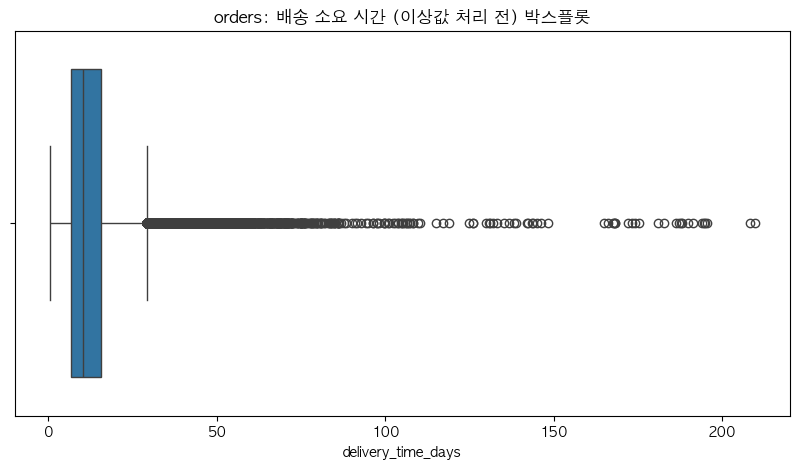


=== orders: 'delivery_time_days' 이상값 제거 후 통계 ===
count    91563.000000
mean        11.048432
std          6.088663
min          0.533414
25%          6.466950
50%          9.909560
75%         14.518877
max         29.149572
Name: delivery_time_days, dtype: float64


=== order_items: 'price' 이상값 처리 전 통계 ===
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


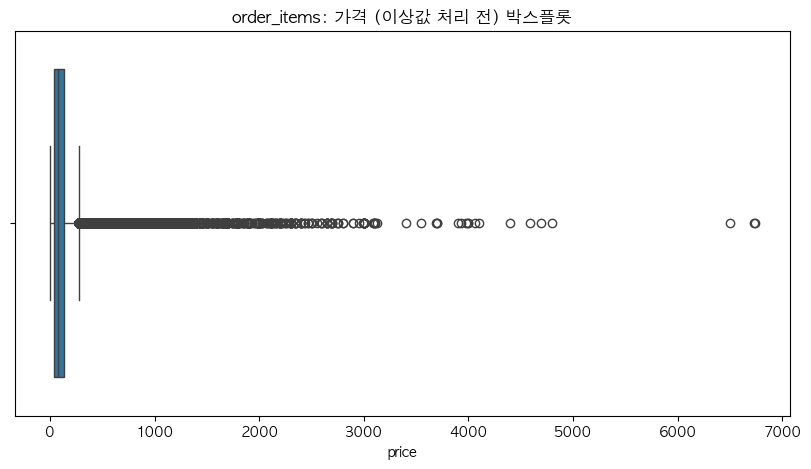


=== order_items: 'price' 이상값 제거 후 통계 ===
count    104223.000000
mean         83.974668
std          58.580002
min           0.850000
25%          38.500000
50%          69.000000
75%         118.990000
max         277.300000
Name: price, dtype: float64


=== products: 'product_weight_g' 이상값 처리 전 통계 ===
count    32949.000000
mean      2276.472488
std       4282.038731
min          0.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64


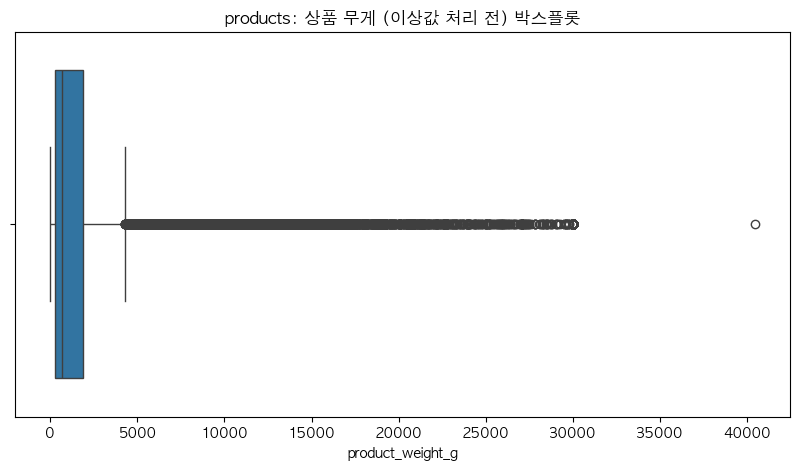


=== products: 'product_weight_g' 이상값 제거 후 통계 ===
count    28398.000000
mean       888.246848
std        877.280855
min          0.000000
25%        275.000000
50%        550.000000
75%       1200.000000
max       4300.000000
Name: product_weight_g, dtype: float64


=== payments: 'payment_value' 이상값 처리 전 통계 ===
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64


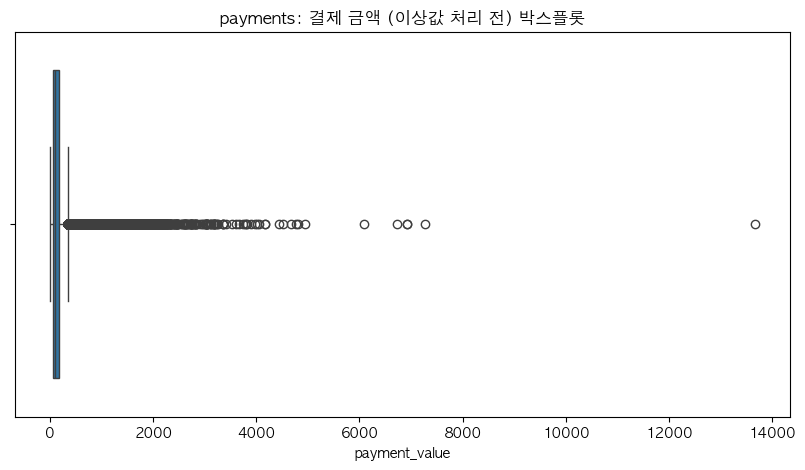


=== payments: 'payment_value' 이상값 제거 후 통계 ===
count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64


In [81]:
# =================================================================
# 1. orders 데이터셋 이상값 처리
# =================================================================

# 날짜/시간 관련 컬럼을 datetime 형식으로 변환합니다.
datetime_cols = [
    'order_purchase_timestamp', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]
for col in datetime_cols:
    orders[col] = pd.to_datetime(orders[col])

# 배송 완료일이 없는 주문은 배송 성과 분석에서 제외합니다.
orders.dropna(subset=['order_delivered_customer_date'], inplace=True)

# '배송 소요 시간' 변수를 생성합니다.
orders['delivery_time_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.total_seconds() / (24 * 3600)

print("=== orders: 'delivery_time_days' 이상값 처리 전 통계 ===")
print(orders['delivery_time_days'].describe())

# 시각화를 통해 이상값 확인 (박스플롯)
plt.figure(figsize=(10, 5))
sns.boxplot(x=orders['delivery_time_days'])
plt.title('orders: 배송 소요 시간 (이상값 처리 전) 박스플롯')
plt.show()

# 통계적 기준(IQR)을 사용한 이상값 처리
Q1 = orders['delivery_time_days'].quantile(0.25)
Q3 = orders['delivery_time_days'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

orders = orders[(orders['delivery_time_days'] >= lower_bound) & (orders['delivery_time_days'] <= upper_bound)]

print("\n=== orders: 'delivery_time_days' 이상값 제거 후 통계 ===")
print(orders['delivery_time_days'].describe())

# =================================================================
# 2. order_items 데이터셋 이상값 처리
# =================================================================

print("\n\n=== order_items: 'price' 이상값 처리 전 통계 ===")
print(order_items['price'].describe())

# 'price' 컬럼의 이상값 시각화
plt.figure(figsize=(10, 5))
sns.boxplot(x=order_items['price'])
plt.title('order_items: 가격 (이상값 처리 전) 박스플롯')
plt.show()

# 통계적 기준(IQR)을 사용한 이상값 처리
Q1 = order_items['price'].quantile(0.25)
Q3 = order_items['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

order_items = order_items[(order_items['price'] >= lower_bound) & (order_items['price'] <= upper_bound)]

print("\n=== order_items: 'price' 이상값 제거 후 통계 ===")
print(order_items['price'].describe())


# =================================================================
# 3. products 데이터셋 이상값 처리
# =================================================================

print("\n\n=== products: 'product_weight_g' 이상값 처리 전 통계 ===")
print(products['product_weight_g'].describe())

# 'product_weight_g' 컬럼의 이상값 시각화
plt.figure(figsize=(10, 5))
sns.boxplot(x=products['product_weight_g'])
plt.title('products: 상품 무게 (이상값 처리 전) 박스플롯')
plt.show()

# 통계적 기준(IQR)을 사용한 이상값 처리
Q1 = products['product_weight_g'].quantile(0.25)
Q3 = products['product_weight_g'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

products = products[(products['product_weight_g'] >= lower_bound) & (products['product_weight_g'] <= upper_bound)]

print("\n=== products: 'product_weight_g' 이상값 제거 후 통계 ===")
print(products['product_weight_g'].describe())


# =================================================================
# 4. payments 데이터셋 이상값 처리
# =================================================================

print("\n\n=== payments: 'payment_value' 이상값 처리 전 통계 ===")
print(payments['payment_value'].describe())

# 'payment_value' 컬럼의 이상값 시각화
plt.figure(figsize=(10, 5))
sns.boxplot(x=payments['payment_value'])
plt.title('payments: 결제 금액 (이상값 처리 전) 박스플롯')
plt.show()

# 통계적 기준(IQR)을 사용한 이상값 처리
Q1 = payments['payment_value'].quantile(0.25)
Q3 = payments['payment_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

payments = payments[(payments['payment_value'] >= lower_bound) & (payments['payment_value'] <= upper_bound)]

print("\n=== payments: 'payment_value' 이상값 제거 후 통계 ===")
print(payments['payment_value'].describe())



In [82]:

# # 이상값만 별도로 추출하여 저장
# # outliers_payments = payments[(payments['payment_value'] < lower_bound) | (payments['payment_value'] > upper_bound)]
# print(f"\n=== payments: 'payment_value' 이상값 개수: {len(outliers_payments)}")
# print("이상값 데이터 미리보기:")
# print(outliers_payments.head())

In [83]:

# 데이터셋을 불러옵니다.
products = pd.read_csv("olist_products_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")

print("=== 변환 전 'products' 데이터프레임 카테고리 ===")
print(products['product_category_name'].head())

# 1. 두 데이터프레임을 병합하여 포르투갈어 카테고리명을 영어로 변환합니다.
# 'product_category_name' 컬럼을 기준으로 두 데이터프레임을 병합합니다.
# 이렇게 하면 'product_category_name_english' 컬럼이 products 데이터프레임에 추가됩니다.
products_merged = pd.merge(products, category_translation, on='product_category_name', how='left')

# 2. 기존 포르투갈어 컬럼을 삭제하거나 이름을 변경합니다.
# 여기서는 기존 컬럼을 삭제하고, 영어 컬럼을 새로운 카테고리 컬럼으로 사용합니다.
products_merged.drop('product_category_name', axis=1, inplace=True)
products_merged.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)

print("\n=== 변환 후 'products_merged' 데이터프레임 카테고리 ===")
print(products_merged['product_category_name'].head())

# 변환된 데이터프레임의 컬럼 목록을 확인하여 변경 사항을 검토합니다.
print("\n=== 변환 후 'products_merged' 컬럼 ===")
print(products_merged.columns)


=== 변환 전 'products' 데이터프레임 카테고리 ===
0               perfumaria
1                    artes
2            esporte_lazer
3                    bebes
4    utilidades_domesticas
Name: product_category_name, dtype: object

=== 변환 후 'products_merged' 데이터프레임 카테고리 ===
0         perfumery
1               art
2    sports_leisure
3              baby
4        housewares
Name: product_category_name, dtype: object

=== 변환 후 'products_merged' 컬럼 ===
Index(['product_id', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'product_category_name'],
      dtype='object')


In [84]:
print(products_merged.tail())
products_merged

                             product_id  product_name_lenght  \
32946  a0b7d5a992ccda646f2d34e418fff5a0                 45.0   
32947  bf4538d88321d0fd4412a93c974510e6                 41.0   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                 50.0   
32949  83808703fc0706a22e264b9d75f04a2e                 60.0   
32950  106392145fca363410d287a815be6de4                 58.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
32946                        67.0                 2.0           12300.0   
32947                       971.0                 1.0            1700.0   
32948                       799.0                 1.0            1400.0   
32949                       156.0                 2.0             700.0   
32950                       309.0                 1.0            2083.0   

       product_length_cm  product_height_cm  product_width_cm  \
32946               40.0               40.0              40.0   
32947               16.0          

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [85]:
# 2. 'product_category_name' 컬럼에 존재하는 모든 고유한 값들을 확인
unique_categories = products_merged['product_category_name'].unique()

print("=== 'product_category_name' 컬럼에 존재하는 모든 고유한 상품 카테고리 종류 ===")
print(unique_categories)

# 상품 종류의 총 개수를 확인하고 싶다면 len() 함수를 사용합니다.
print(f"\n총 상품 카테고리 개수: {len(unique_categories)}개")

=== 'product_category_name' 컬럼에 존재하는 모든 고유한 상품 카테고리 종류 ===
['perfumery' 'art' 'sports_leisure' 'baby' 'housewares'
 'musical_instruments' 'cool_stuff' 'furniture_decor' 'home_appliances'
 'toys' 'bed_bath_table' 'construction_tools_safety'
 'computers_accessories' 'health_beauty' 'luggage_accessories'
 'garden_tools' 'office_furniture' 'auto' 'electronics' 'fashion_shoes'
 'telephony' 'stationery' 'fashion_bags_accessories' 'computers'
 'home_construction' 'watches_gifts' 'construction_tools_construction'
 'pet_shop' 'small_appliances' 'agro_industry_and_commerce' nan
 'furniture_living_room' 'signaling_and_security' 'air_conditioning'
 'consoles_games' 'books_general_interest' 'costruction_tools_tools'
 'fashion_underwear_beach' 'fashion_male_clothing'
 'kitchen_dining_laundry_garden_furniture'
 'industry_commerce_and_business' 'fixed_telephony'
 'construction_tools_lights' 'books_technical' 'home_appliances_2'
 'party_supplies' 'drinks' 'market_place' 'la_cuisine'
 'costruction_tools

- 날짜 데이터 변환(수치적 계산과 분석을 위함)
- 

In [86]:
print("=== 변환 전 데이터 타입 ===")
print(orders[datetime_cols].info())

# 각 컬럼을 datetime 형식으로 변환
for col in datetime_cols:
    orders[col] = pd.to_datetime(orders[col])

print("\n=== 변환 후 데이터 타입 ===")
print(orders[datetime_cols].info())

# 변환된 데이터를 확인하기 위해 첫 5개 행을 출력합니다.
print("\n=== 변환 후 데이터 미리보기 ===")
print(orders[datetime_cols].head())




=== 변환 전 데이터 타입 ===
<class 'pandas.core.frame.DataFrame'>
Index: 91563 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_purchase_timestamp       91563 non-null  datetime64[ns]
 1   order_delivered_customer_date  91563 non-null  datetime64[ns]
 2   order_estimated_delivery_date  91563 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 2.8 MB
None

=== 변환 후 데이터 타입 ===
<class 'pandas.core.frame.DataFrame'>
Index: 91563 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_purchase_timestamp       91563 non-null  datetime64[ns]
 1   order_delivered_customer_date  91563 non-null  datetime64[ns]
 2   order_estimated_delivery_date  91563 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memor

=== 병합된 데이터프레임 미리보기 ===
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delive

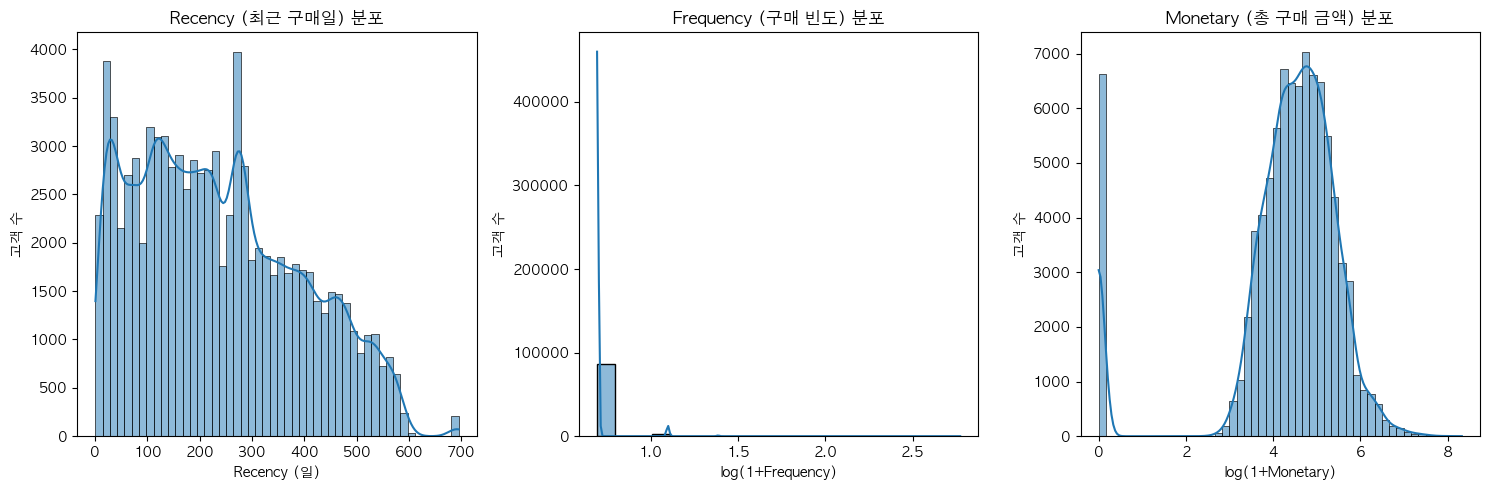


=== RFM 변수 간의 상관관계(Correlation) ===
            Recency  Frequency  Monetary
Recency    1.000000  -0.020647 -0.014085
Frequency -0.020647   1.000000  0.209282
Monetary  -0.014085   0.209282  1.000000


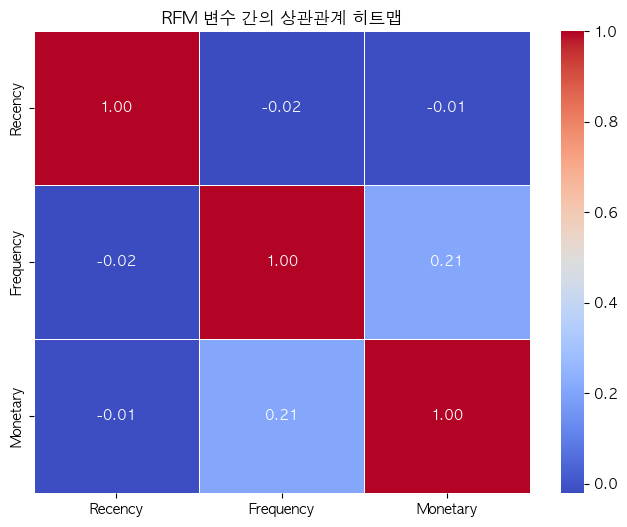

In [89]:
# =================================================================
# 1. 데이터 전처리 및 병합
# =================================================================

# orders 데이터프레임의 'order_purchase_timestamp'를 datetime으로 변환
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# 'orders'와 'order_items'를 병합
orders_items_merged = pd.merge(orders, order_items, on='order_id', how='left')

# 'orders_items_merged'와 'payments'를 병합
orders_payments_merged = pd.merge(orders_items_merged, payments, on='order_id', how='left')

# 최종 데이터프레임에 'customers' 데이터 병합
df_merged = pd.merge(customers, orders_payments_merged, on='customer_id', how='left')

# 불필요한 결측값 제거
df_merged.dropna(subset=['order_id'], inplace=True)

print("=== 병합된 데이터프레임 미리보기 ===")
print(df_merged.head())

# =================================================================
# 2. RFM 변수 계산
# =================================================================

# 현재 날짜 설정 (데이터 수집 마지막 날짜 + 1일)
today = df_merged['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# 고객별 'Recency' 계산
# 각 고객의 가장 최근 주문 날짜를 찾고, 'today'와의 차이를 일(day) 단위로 계산
recency_df = df_merged.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
recency_df.columns = ['customer_unique_id', 'last_purchase_date']
recency_df['Recency'] = (today - recency_df['last_purchase_date']).dt.days

# 고객별 'Frequency' 계산
# 각 고객의 고유 주문 횟수를 세어 'Frequency'로 저장
frequency_df = df_merged.groupby('customer_unique_id')['order_id'].nunique().reset_index()
frequency_df.columns = ['customer_unique_id', 'Frequency']

# 고객별 'Monetary' 계산
# 각 고객의 총 결제 금액을 합산하여 'Monetary'로 저장
monetary_df = df_merged.groupby('customer_unique_id')['payment_value'].sum().reset_index()
monetary_df.columns = ['customer_unique_id', 'Monetary']

# 계산된 RFM 변수들을 하나의 데이터프레임으로 병합
rfm_df = recency_df.merge(frequency_df, on='customer_unique_id').merge(monetary_df, on='customer_unique_id')

# 불필요한 'last_purchase_date' 컬럼 제거
rfm_df.drop('last_purchase_date', axis=1, inplace=True)

print("\n=== RFM 데이터프레임 미리보기 ===")
print(rfm_df.head())

# =================================================================
# 3. RFM 변수 분포 시각화
# =================================================================

plt.figure(figsize=(15, 5))

# Recency 히스토그램
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=50, kde=True)
plt.title('Recency (최근 구매일) 분포')
plt.xlabel('Recency (일)')
plt.ylabel('고객 수')

# Frequency 히스토그램
plt.subplot(1, 3, 2)
# Frequency는 대부분 1이므로, 로그 스케일을 적용하여 분포를 더 잘 보이게 합니다.
sns.histplot(np.log1p(rfm_df['Frequency']), bins=20, kde=True)
plt.title('Frequency (구매 빈도) 분포')
plt.xlabel('log(1+Frequency)')
plt.ylabel('고객 수')

# Monetary 히스토그램
plt.subplot(1, 3, 3)
# Monetary도 치우친 분포를 보일 수 있어, 로그 스케일을 적용합니다.
sns.histplot(np.log1p(rfm_df['Monetary']), bins=50, kde=True)
plt.title('Monetary (총 구매 금액) 분포')
plt.xlabel('log(1+Monetary)')
plt.ylabel('고객 수')

plt.tight_layout()
plt.show()

print("\n=== RFM 변수 간의 상관관계(Correlation) ===")
print(rfm_df[['Recency', 'Frequency', 'Monetary']].corr())

# RFM 변수 간의 상관관계 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_df[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('RFM 변수 간의 상관관계 히트맵')
plt.show()


In [92]:
#RFM score 계산 (고객 세그먼트 분류)
# Recency 점수 (값이 낮을수록 높은 점수)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5,4,3,2,1]).astype(int)

# Frequency 점수 (값이 클수록 높은 점수)
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)

# Monetary 점수 (값이 클수록 높은 점수)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)

# 최종 RFM Score
rfm_df['RFM_Score'] = rfm_df['R_Score'] + rfm_df['F_Score'] + rfm_df['M_Score']

# 세그먼트 분류 
def segment_customer(row):
    if row['RFM_Score'] >= 13:
        return '최우수 고객 (Champions)'
    elif 10 <= row['RFM_Score'] < 13:
        return '충성 고객 (Loyal Customers)'
    elif 7 <= row['RFM_Score'] < 10:
        return '잠재 고객 (Potential Loyalists)'
    elif 5 <= row['RFM_Score'] < 7:
        return '이탈 위험 고객 (At Risk)'
    else:
        return '휴면 고객 (Lost Customers)'

rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

# 세그먼트 별 분포 확인 
segment_summary = rfm_df['Segment'].value_counts(normalize=True).mul(100).round(2)
print(segment_summary)


rfm_df['RFM_Score'].value_counts().sort_index() 


Segment
잠재 고객 (Potential Loyalists)    41.20
충성 고객 (Loyal Customers)        33.60
이탈 위험 고객 (At Risk)             13.26
최우수 고객 (Champions)              8.65
휴면 고객 (Lost Customers)          3.28
Name: proportion, dtype: float64


RFM_Score
3       750
4      2161
5      4420
6      7340
7     10655
8     12524
9     13353
10    12314
11    10464
12     7018
13     4427
14     2311
15      936
Name: count, dtype: int64

### 과제 1 핵심 지표 

최근성 (Recency): 고객이 가장 최근에 구매한 날짜로부터 현재까지의 경과 일수.

빈도 (Frequency): 고객이 총 몇 번 구매했는지 나타내는 주문 횟수.

금액 (Monetary): 고객이 구매를 통해 지출한 총 금액.

이 세 가지 지표를 바탕으로 고객을 우수 고객, 이탈 가능 고객, 신규 고객 등으로 분류하고, 각 그룹에 맞는 마케팅 전략을 수립하는 것이 RFM 분석의 주요 목표

RFM 분석 결과를 보면, Recency, Frequency, Monetary 변수 간의 상관관계가 매우 낮다는 점이 가장 큰 특징입니다. 이는 각 변수가 독립적으로 고객의 행동을 잘 나타내고 있다는 뜻이므로, 이 세 가지 지표를 모두 활용하여 고객을 세분화하는 것이 중요합니다.

---

### 2.고객 그룹별 맞춤형 마케팅 전략
우선, RFM 점수를 기준으로 고객을 몇 개의 그룹으로 나누고, 각 그룹에 맞는 전략을 적용할 수 있습니다. 예를 들어, 다음과 같은 그룹을 고려해 볼 수 있습니다.

1. 최우수 고객 (Champions) 👑
특징: 최근에 구매했고, 구매 횟수와 금액 모두 높은 고객.

전략: 이들이 계속해서 구매할 수 있도록 VIP 혜택을 제공하고, 신제품 또는 독점 프로모션에 대한 정보를 먼저 제공하여 충성도를 높입니다.

2. 충성 고객 (Loyal Customers) 🤝
특징: 꾸준히 구매하며, 구매 횟수가 높은 고객.

전략: 재구매를 유도하기 위한 개인화된 할인 쿠폰을 제공하고, 이들이 자주 구매하는 상품을 기반으로 맞춤형 추천을 합니다.

3. 잠재적 이탈 고객 (At-Risk) 🚨
특징: 최근 구매일이 오래되었고, 구매 횟수와 금액이 보통인 고객.

전략: 재활성화 캠페인을 진행합니다. 예를 들어, '오랜만에 방문해주셔서 감사합니다'와 같은 메시지와 함께 특별 할인 혜택을 제공하여 재방문을 유도합니다.

4. 신규 고객 (New Customers) 🌱
특징: 최근에 처음 구매한 고객.

전략: 첫 구매 경험에 만족할 수 있도록 구매한 상품에 대한 사용 팁이나 관련 상품 정보를 제공하여 다음 구매를 유도합니다. 이메일이나 앱 알림을 통해 지속적으로 관계를 구축해야 합니다.

---
### 3.분석 결과를 활용한 심화 전략

히트맵에서 Frequency와 Monetary가 약한 양의 상관관계를 보였듯이, 구매 횟수가 많은 고객이 총 지출 금액도 높을 가능성이 있습니다. 따라서 '자주 구매하는 고객'에게 더 높은 할인율이나 포인트를 제공하여 구매를 더 많이 하도록 유도하는 전략이 효과적일 수 있습니다.

또한, 향후 분석을 통해 각 고객 그룹별로 선호하는 상품 카테고리를 파악하여 맞춤형 상품 추천 시스템을 구축한다면, 마케팅 효과를 더욱 극대화할 수 있습니다.

# D2 진행내용 요약

### 1. 데이터 전처리 및 병합

가장 먼저 `customers`, `orders`, `order_items`, `payments`라는 네 개의 개별 데이터셋을 하나의 큰 데이터프레임으로 합쳤습니다. 이 과정에서 `orders` 데이터프레임의 `'order_purchase_timestamp'` 컬럼을 날짜/시간(`datetime`) 형식으로 변환하여 이후 계산이 가능하도록 준비했습니다. 이 병합된 데이터는 RFM 분석의 기초가 되었습니다.

---

### 2. RFM 지표 계산

병합된 데이터를 바탕으로 RFM 분석의 핵심 지표인 **Recency, Frequency, Monetary**를 각각 계산했습니다.

* **Recency (최근 구매일수)**: 고객의 가장 최근 구매일로부터 현재까지의 경과 일수를 계산했습니다. 이 수치가 낮을수록 최근에 구매한 고객입니다.
* **Frequency (구매 빈도)**: 고객별로 고유한 주문 건수를 세어 구매 빈도를 파악했습니다. 이 수치가 높을수록 자주 구매하는 고객입니다.
* **Monetary (총 구매 금액)**: 고객별로 지불한 총 금액을 합산했습니다. 이 수치가 높을수록 구매 가치가 높은 고객입니다.

---

### 3. 기초 시각화 및 상관관계 분석

계산된 RFM 지표를 시각화하여 데이터의 분포를 탐색했습니다.

* **히스토그램**: `Recency`, `Frequency`, `Monetary` 각각의 분포를 히스토그램으로 확인했습니다. 특히 `Frequency`와 `Monetary`는 데이터가 한쪽으로 치우쳐 있어서 **로그 변환**을 적용하여 분포를 더 잘 이해할 수 있도록 했습니다.
* **상관관계**: RFM 지표 간의 상관관계를 계산하여 서로 어떤 관계가 있는지 확인했습니다. 분석 결과, 세 지표 간에 **상관관계가 거의 없다는 것을 확인**했으며, 이는 각 지표가 고객을 분류하는 데 독립적인 역할을 할 수 있음을 보여줍니다.

이러한 과정을 통해 고객 데이터를 분석하고, 앞으로의 마케팅 전략 수립을 위한 기초를 마련했습니다.